# Бизнес анализ

**Бизнес-цель заказчика**
Расширить бизнес, открыть несколько новых кофеен в течении ближайших 4 месяцев  

**Цель анализа данных**  
Необходимо понять, как распределяются продажи по сети кофеен, какие виды продукции вносят наибольший вклад в объем продаж, от каких стоит отказаться.
Необходимо проанализировать продажи в разрезе категорий и типов продукции, определить группы товаров с наилучшими и наихудшими показателями выручки, а также выявить, какие магазины оказывают наибольшее влияние на общий объем продаж.  

**Объект исследования**  
Продукция кофеен  

**Предмет исследования**  
Данные транзакций клиентов, данные о покупках, показатели продаж кофеен

# Изучение данных

### Импорт библиотек

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Подгрузка, чтение файла

In [6]:
df = pd.read_excel('coffee_shop_easy.xlsx')

### Обзор датасета

In [7]:
df.sample(5)

,transaction_id,product_id,product_name,product_category,product_type,sales_outlet_id,store_city,total
23144,46458,61,Sustainably Grown Organic Lg,Drinking Chocolate,Hot chocolate,8,Москва,308.75
15547,21275,57,Spicy Eye Opener Chai Lg,Tea,Brewed Chai tea,8,Москва,403.00
4915,4917,32,Ethiopia Rg,Coffee,Gourmet brewed coffee,8,Москва,390.00
11238,12460,23,Our Old Time Diner Blend Rg,Coffee,Drip coffee,5,Москва,325.00
13599,17672,51,Earl Grey Lg,Tea,Brewed Black tea,5,Москва,195.00


In [8]:
df.shape

(24852, 8)

In [9]:
df["sales_outlet_id"] = df["sales_outlet_id"].astype(str)
df.drop(columns=['transaction_id', 'product_id']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24852 entries, 0 to 24851
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      24852 non-null  object 
 1   product_category  24852 non-null  object 
 2   product_type      24852 non-null  object 
 3   sales_outlet_id   24852 non-null  object 
 4   store_city        24852 non-null  object 
 5   total             24852 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


In [10]:
sum(df.duplicated())

0

In [11]:
df.drop(columns=['transaction_id', 'product_id']).describe(include='all')

,product_name,product_category,product_type,sales_outlet_id,store_city,total
count,24852,24852,24852,24852,24852,24852.000000
unique,80,9,29,3,2,NaN
top,Morning Sunrise Chai Rg,Coffee,Brewed Chai tea,3,Москва,NaN
freq,521,9948,2990,8593,16259,NaN
mean,NaN,NaN,NaN,NaN,NaN,299.613802
std,NaN,NaN,NaN,NaN,NaN,230.478316
min,NaN,NaN,NaN,NaN,NaN,52.000000
25%,NaN,NaN,NaN,NaN,NaN,195.000000
50%,NaN,NaN,NaN,NaN,NaN,243.750000
75%,NaN,NaN,NaN,NaN,NaN,390.000000


### Выявление проблем

1) Все признаки представляют ценность для анализа.  
2) Дубликаты строк в датасете отсутствуют.  
3) Все значения в датасете заполнены.   
4) Вложенные значения отсутствуют  
5) Необходимость приведения к необходимому формату отсутствует.  
6) Необходимость расчета дополнительных значений отсутствует.  
7) Закодированные значения отсутствуют

Датасет не нуждается в предобработке.

# Анализ данных



**Этапы анализа:**

1) Определить целевые  
2) Определить типы переменных  
3) Проанализировать каждый признак отдельно  
4) Проинтерпритировать результаты  

**Аналитиеские цели:**  
1) Понять, как распределяются продажи по сети кофеен  
2) Выявить какие виды продукции вносят наибольший вклад в объем продаж  
3) Выявить от каких стоит видов продукции стоит отказаться

**Целевые переменные:**  
1) product_name  
2) product_category  
3) sales_outlet_id  
4) total

**Типы переменных**  
1) Категориальные - product_name, product_category, product_type, store_city, sales_outlet_id, sales_outlet_id  
2) Количественные - total  


In [12]:
df

,transaction_id,product_id,product_name,product_category,product_type,sales_outlet_id,store_city,total
0,0,52,Traditional Blend Chai Rg,Tea,Brewed Chai tea,3,Санкт-Петербург,162.50
1,1,27,Brazilian Lg,Coffee,Organic brewed coffee,3,Санкт-Петербург,455.00
2,2,46,Serenity Green Tea Rg,Tea,Brewed Green tea,3,Санкт-Петербург,325.00
3,3,23,Our Old Time Diner Blend Rg,Coffee,Drip coffee,3,Санкт-Петербург,325.00
4,4,34,Jamaican Coffee River Sm,Coffee,Premium brewed coffee,3,Санкт-Петербург,159.25
...,...,...,...,...,...,...,...,...
24847,49882,41,Cappuccino Lg,Coffee,Barista Espresso,8,Москва,276.25
24848,49888,87,Ouro Brasileiro shot,Coffee,Barista Espresso,8,Москва,136.50
24849,49890,25,Brazilian Sm,Coffee,Organic brewed coffee,8,Москва,286.00
24850,49892,44,Peppermint Rg,Tea,Brewed herbal tea,8,Москва,325.00


#### Распределение продаж по сети кофеен

In [13]:
sales_by_outlet = df.groupby(['sales_outlet_id', 'store_city'])['total'].agg(['sum', 'count', 'mean']).reset_index()
sales_by_outlet.columns = ['sales_outlet_id', 'store_city', 'total_revenue', 'transactions_count', 'average_check']
sales_by_outlet['revenue_share'] = (sales_by_outlet['total_revenue'] / sales_by_outlet['total_revenue'].sum()) * 100
sales_by_outlet.sort_values('total_revenue', ascending=False)

,sales_outlet_id,store_city,total_revenue,transactions_count,average_check,revenue_share
1,5,Москва,2604307.55,8545,304.775606,34.975917
0,3,Санкт-Петербург,2515132.10,8593,292.695461,33.778288
2,8,Москва,2326562.55,7714,301.602612,31.245795


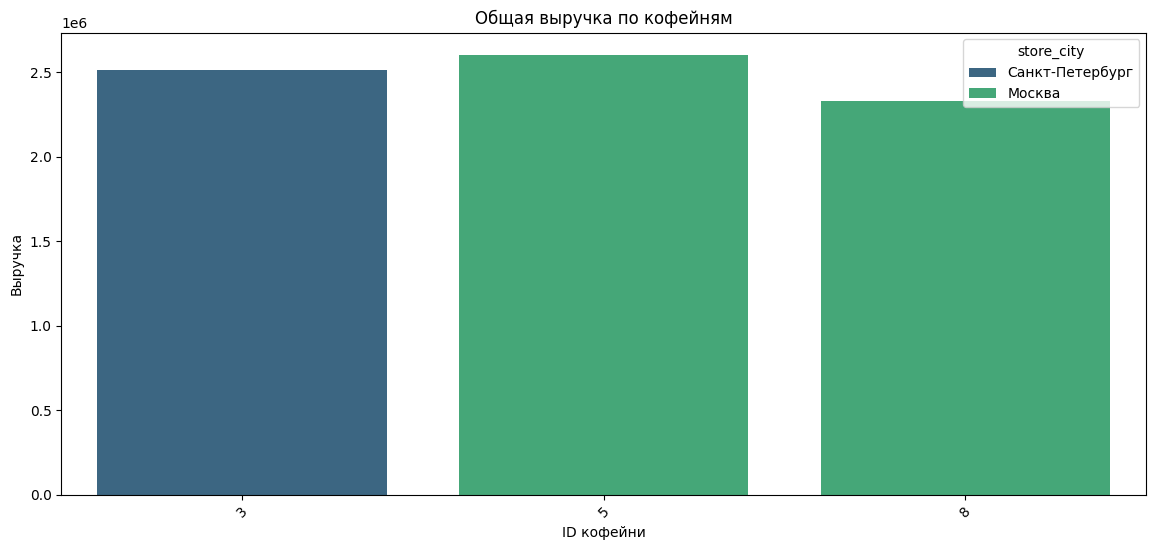

In [14]:
plt.figure(figsize=(14, 6))
sns.barplot(x='sales_outlet_id', y='total_revenue', hue='store_city', data=sales_by_outlet, palette='viridis')
plt.title('Общая выручка по кофейням')
plt.xlabel('ID кофейни')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.show()

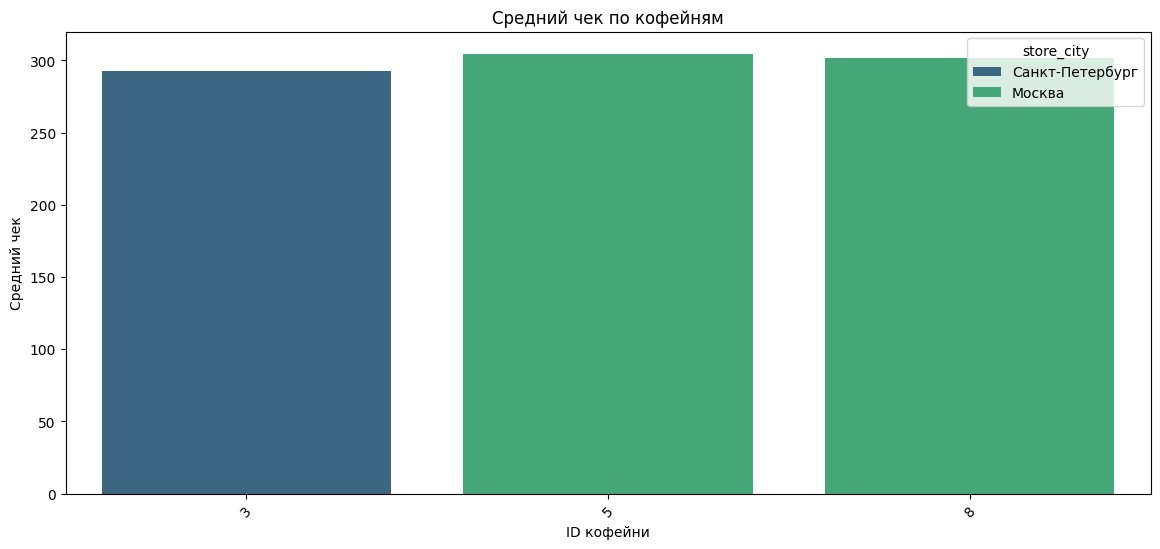

In [15]:
plt.figure(figsize=(14, 6))
sns.barplot(x='sales_outlet_id', y='average_check', hue='store_city', data=sales_by_outlet, palette='viridis')
plt.title('Средний чек по кофейням')
plt.xlabel('ID кофейни')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.show()

##### Выводы
1) Кофейня 5 является лидером по общей выручке, а также по среднему чеку. Кофейня 5 демонстирует успешный баланс, поскольку высокая общая выручка указывает на большой поток клиентов, а высокий средний чек говорит об эффективности продаж (продажа дорогих позиций, высокий средний расход на клиента). Данная кофейня выступает эталлонной в сети.  
2) Кофейня 3 является второй по общей выручке, но последней по среднему чеку. Кофейня привлекает большой объем клиентов, отсюда высокая общая выручка, но неэффективно монетизирует каждого посетителя.   
3) Кофейня 8 является последней по общей выручке, но вторая по среднему чеку. Кофейня эффективно монетизирует каждого пришедшего клиента, отсюда высокий средний чек, но испытывает проблемы с привлечением достаточного количества клиентов, отсюда низкая общая выручка  



#### Группировка сумм продаж по категориям продуктов

In [35]:
# Анализ продаж по категориям продуктов
sales_by_category = df.groupby('product_category')['total'].agg(['sum', 'count']).reset_index()
sales_by_category.columns = ['product_category', 'total_revenue', 'transactions_count']
sales_by_category['revenue_share'] = (sales_by_category['total_revenue'] / sales_by_category['total_revenue'].sum()) * 100
sales_by_category.sort_values('total_revenue', ascending=False).reset_index()

,index,product_category,total_revenue,transactions_count,revenue_share
0,2,Coffee,2962352.25,9948,39.784466
1,8,Tea,2190841.25,7866,29.423054
2,0,Bakery,889266.30,3780,11.942869
3,4,Drinking Chocolate,796363.75,1955,10.695186
4,3,Coffee beans,315695.25,217,4.239795
5,1,Branded,96590.00,82,1.297206
6,6,Loose Tea,92985.75,155,1.248801
7,5,Flavours,64116.00,782,0.861080
8,7,Packaged Chocolate,37791.65,67,0.507543


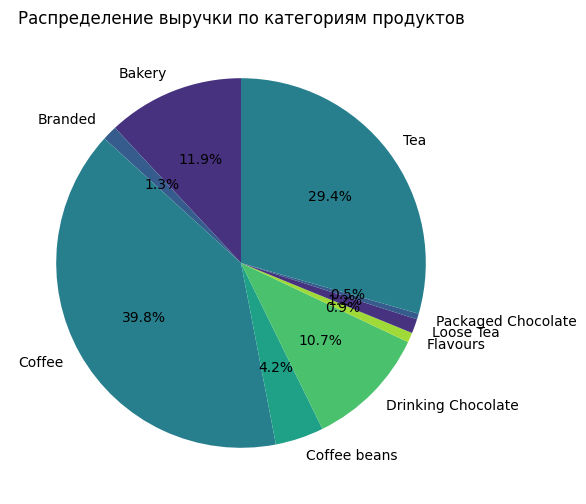

In [17]:
# Визуализация продаж по категориям
plt.figure(figsize=(12, 6))
plt.pie(sales_by_category['total_revenue'], labels=sales_by_category['product_category'],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Распределение выручки по категориям продуктов')
plt.show()

##### Выводы
1) Явные лидеры по вкладу в выручку (80.84%): Coffee (39.8%), Tea (29.4%), Bakery (11.9%) и Drinking Chocolate (10.7%). Кофе и чай формируют основу бизнеса подтверждая статус ключевых продуктов, высокий объем транзакций, 9948 для кофе и 7866 для чая, указывает на массовый спрос. Также выпечка и питьевой шоколад критически важные категории из-за высокой совокупной доли - 22.6%.  
2) Узкоспециализированные продукты с потенциалом (6.8%): Coffee beans (4.2%), Branded (1.3%) и Loose Tea (1.2%). Кофейные зерна демонстрируют высокую среднюю стоимость заказа (~₽1455), что может говорить о спросе среди ценителей. Также Branded и Loose Tea при малом количестве транзакций имеют высокий средний чек (₽1178 и ₽600), что указывает на премиальный сегмент.  
3) Нерентабельные категории (1.4%): Flavours (0.9%) и Packaged Chocolate (0.5%) генерируют минимальную выручку. Вкусовые добавки при большом кол-ве транзакций имеют крайне низкую доходность на заказ. Пакетированный шоколад имеет низкий спрос и вклад.  

#### Группировка сумм продаж по типам продуктов


In [32]:
# Анализ продаж по типам продуктов
sales_by_category = df.groupby('product_type')['total'].agg(['sum', 'count']).reset_index()
sales_by_category.columns = ['product_type', 'total_revenue', 'transactions_count']
sales_by_category['revenue_share'] = (sales_by_category['total_revenue'] / sales_by_category['total_revenue'].sum()) * 100
sales_by_category.sort_values('total_revenue', ascending=False).reset_index()

,product_type,total_revenue,transactions_count,revenue_share
0,Barista Espresso,993135.00,2765,13.337828
4,Brewed Chai tea,865263.75,2990,11.620514
17,Hot chocolate,796363.75,1955,10.695186
13,Gourmet brewed coffee,772447.00,2859,10.373983
3,Brewed Black tea,534235.00,1967,7.174790
6,Brewed herbal tea,519382.50,1910,6.975320
25,Premium brewed coffee,421918.25,1378,5.666373
22,Organic brewed coffee,420017.00,1483,5.640839
27,Scone,402223.25,1703,5.401869
10,Drip coffee,354835.00,1463,4.765443


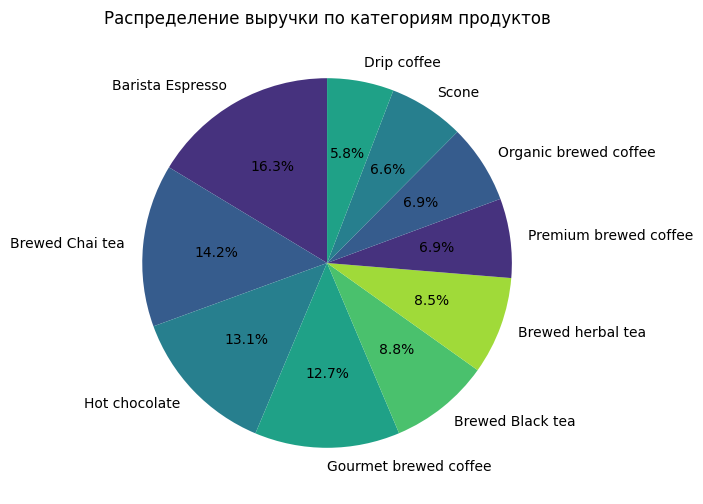

In [34]:
# Визуализация продаж по 10 лучшим типам
sales_by_category = sales_by_category.sort_values('total_revenue', ascending=False)[:10]
plt.figure(figsize=(12, 6))
plt.pie(sales_by_category['total_revenue'], labels=sales_by_category['product_type'],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Распределение выручки по категориям продуктов')
plt.show()

#### Группировка сумм продаж по названию продукта


In [37]:
# Анализ продаж по конкретным продуктам
sales_by_product = df.groupby(['product_name', 'product_category'])['total'].agg(['sum', 'count']).reset_index()
sales_by_product.columns = ['product_name', 'product_category', 'total_revenue', 'transactions_count']
sales_by_product['revenue_share'] = (sales_by_product['total_revenue'] / sales_by_product['total_revenue'].sum()) * 100

In [38]:
#Топ-10 продуктов по выручке:
sales_by_product.sort_values('total_revenue', ascending=False).head(10).reset_index()

,index,product_name,product_category,total_revenue,transactions_count,revenue_share
0,75,Sustainably Grown Organic Lg,Drinking Chocolate,237428.75,516,3.188674
1,20,Dark chocolate Lg,Drinking Chocolate,225810.00,504,3.032634
2,48,Latte Rg,Coffee,195861.25,472,2.630422
3,53,Morning Sunrise Chai Lg,Tea,194740.00,499,2.615363
4,47,Latte,Coffee,194268.75,516,2.609034
5,6,Cappuccino Lg,Coffee,190336.25,468,2.556221
6,76,Sustainably Grown Organic Rg,Drinking Chocolate,181837.50,493,2.442082
7,5,Cappuccino,Coffee,175743.75,476,2.360243
8,31,Ethiopia Lg,Coffee,169715.00,488,2.279277
9,43,Jamaican Coffee River Lg,Coffee,162581.25,442,2.183470


In [39]:
#Топ-10 продуктов по количеству продаж:
sales_by_product.sort_values('transactions_count', ascending=False).head(10).reset_index()

,index,product_name,product_category,total_revenue,transactions_count,revenue_share
0,54,Morning Sunrise Chai Rg,Tea,129837.50,521,1.743721
1,15,Columbian Medium Roast Rg,Coffee,127400.00,516,1.710985
2,47,Latte,Coffee,194268.75,516,2.609034
3,75,Sustainably Grown Organic Lg,Drinking Chocolate,237428.75,516,3.188674
4,79,Traditional Blend Chai Rg,Tea,128862.50,515,1.730627
5,4,Brazilian Sm,Coffee,111397.00,515,1.496065
6,60,Our Old Time Diner Blend Sm,Coffee,101530.00,515,1.363550
7,26,English Breakfast Lg,Tea,146055.00,509,1.961522
8,71,Spicy Eye Opener Chai Lg,Tea,148505.50,507,1.994433
9,69,Serenity Green Tea Rg,Tea,124150.00,506,1.667338


In [40]:
#Наименее популярные продукты (нижние 10 по выручке):
sales_by_product.sort_values('total_revenue').head(10).reset_index()

,index,product_name,product_category,total_revenue,transactions_count,revenue_share
0,62,Peppermint,Loose Tea,8144.50,14,0.109381
1,22,Earl Grey,Loose Tea,8726.25,15,0.117194
2,19,Dark chocolate,Packaged Chocolate,8736.00,21,0.117325
3,70,Spicy Eye Opener Chai,Loose Tea,9252.75,13,0.124265
4,36,Guatemalan Sustainably Grown,Coffee beans,11700.00,18,0.157131
5,52,Morning Sunrise Chai,Loose Tea,12350.00,20,0.165861
6,67,Serenity Green Tea,Loose Tea,12626.25,21,0.169571
7,77,Traditional Blend Chai,Loose Tea,12798.50,22,0.171884
8,49,Lemon Grass,Loose Tea,13380.25,23,0.179697
9,38,Hazelnut syrup,Flavours,14300.00,181,0.192049


##### Выводы
1) Лидеры продаж: горячие напитки крупных размеров.

Топ-3 продукта по выручке Sustainably Grown Organic Lg (3.19% выручки), Dark chocolate Lg (3.03% выручки), Latte Rg (2.63% выручки).

Топ-3 по количеству транзакций: Morning Sunrise Chai Rg (521 продажа), Columbian Medium Roast Rg (516 продаж), Latte (516 продаж).

Продукты с маркировкой Lg (Large) и Rg (Regular) доминируют в выручке, а Rg/Sm (Regular/Small) — в количестве заказов.

2) Низкорентабельные позиции: рассыпчатые чаи и сиропы. Аутсайдеры по выручке (менее 0.2% каждый): Loose Tea, Flavours, Packaged Chocolate.

# Рекомендации

1) Для всей сети:

Детально изучить и задокументировать успешные практики Кофейни 5: Что именно делают сотрудники, как построен ассортимент, мерчандайзинг, ценообразование, маркетинг в ее локации.

Организовать обучение и обмен опытом: Топ-менеджеры/бариста из Кофейни 5 могут провести тренинги для команд Кофеен 3 и 8. Фокус для Кофейни 3 - на повышении среднего чека, для Кофейни 8 - на привлечении и удержании клиентов.

Стандартизировать лучшие практики: Внедрить наиболее эффективные элементы из Кофейни 5 во всех точках сети, адаптируя под специфику локации.


2) Для категорий товаров

Для лидеров категорий товаров (Coffee, Tea, Bakery, Drinking Chocolate) можно внедрить комбо-предложения, например, "Кофе + выпечка со скидкой 15%", особенно подойдет такой подход для Кофейни 3, где самый низкий средний чек.

Полностью исключите из ассортимента Packaged Chocolate у которого крайне низкий спрос (67 транзакций), освободившееся место можно будет использовать под актуальные товары. Flavours составляет всего 0.9% выручки, 782 транзакции при ничтожной выручке — ключевая "дыра" в рентабельности. Для повышения лояльности к клиентам можно отказаться от продажи Flavours как самостоятельного товара. Оставьте сиропы бесплатной опцией к кофе/чаю. Если отказ невозможен, сократите линейку до 2–3 топовых вкусов и повысьте цену в 1.5–2 раза.

3) Для конкретных продуктов
Рассыпчатые чаи (Loose Tea) 7 из 10 аутсайдеров по выручке. Полностью убрать линейку (кроме Morning Sunrise Chai — если он связан с популярным напитком). Перенаправление бюджета с Loose Tea/Flavours на продвижение топовых продуктов.
